# Compte rendu des premiers essais

Le but de ce document est de rendre compte de la progression du projet au fil des séances.

## Premier modèle : des cordes vocales à partir d'un système multi-masse.

La première méthode populaire pour modéliser des cordes vocales à partir de phénomènes physique a été celle de J. L Flanagan dans un article intitulé <em>source system interaction in the vocal tract</em> paru en 1968.
C'est à partir de cette idée que nous allons réaliser notre première modélisation de corde vocale. Nous n'en garderons en réalité que l'idée car les calculs présentés dans l'article dépasse pour l'instant nos compétence. De plus, le but est de produire un premier résultat rapidement pour bien cerner les limites et difficultées du projet.

Voici une description rapide du système de masses oscillantes que nous allons utiliser : 

![masse-ressort](unnamed.gif)

Dans un premier temps, on ne tiendra pas compte de l'amortissement fluide $C$.

En appliquant le principe fondamental de la dynamique, on obtient :

$$m\ddot{y} = -2T\sin(\theta) = -2k(s-a_0)y/s$$

$$\omega^2 = -\frac{\ddot{y}}{y} = \frac{2k}{m}\left(1-\frac{a_0}{a}\right)$$

$$f = \frac{1}{\pi}\sqrt{\frac{T}{ml}} $$

### Remarque

>En comparant la loi de Hooke et la formule qui déterminer le module de Young $E$, on peut trouver une relation de proportionnalité inverse entre $k$ la constante de raideur du ressort et $l$ la longueur des ressort, qui seront ici en fait des bandes élastiques.

$$F= \frac{AE}{l}\Delta l \;\;\; F=-k\Delta{l} \; \implies k \propto \frac{1}{l}$$

On a obtenu la fréquence à laquelle vibre nos cordes vocales, on peut calculer cette fréquence pour $f_n$ où $f_1$ est la fréquence fondamentale.

$$f_n = \frac{1}{\pi}\sqrt{\frac{n^2}{ml}} $$

Pour comprendre comment ce model fonctionne, il faut s'imaginer une ribenbelle de petites masses oscillantes tel que pour la n-ième masse d'une série de masses oscillantes, sa taille et la longueur de son élastique est $1/n$ celle de la première. Bien sûr, il peut y avoir plusieurs séries de masse différentes partant d'un fréquence $f_1$ différente.

## Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import struct

#Default values are m = 0.15 * 10**(-3) kg, l = 1.4 * 10**(-3) m, T = 3 N
m = 0.15 * 10**(-3) #kg 
l = 1.4 * 10**(-3) #m
T =  1#N

In [3]:
def frequency_from_fundamental(n, round_at=0, logs=False):
    
    """Calculate frequency based on a {mass + ruberband} system."""

    frequency = 1/np.pi * np.sqrt(n**2*T/(m*l))
    
    if round_at:
        frequency = round(frequency, round_at)
        
    if logs:
        print("fundamental frequency : ", 1/2 * np.sqrt(T/(m*l)), "Hz")
        print("frequency", n,  "is", frequency, "Hz")
        
    return frequency

def add_sine_waves(listOfSineWave, logs=False):
    
    """Sums list of float64 term by term"""
    
    sumOfSineWaves = np.copy(listOfSineWave[0])

    if logs: 
        print("sumOfSineWaves", sumOfSineWaves)
        print(listOfSineWave.ndim)

    for i in range(1, len(listOfSineWave)):
        sumOfSineWaves += listOfSineWave[i]
        #print("sum at", i, ",", sumOfSineWaves)

    if logs:
        print("sumOfSineWaves :", sumOfSineWaves)

    return sumOfSineWaves

def createWaveFile(name, listOfSineWave, samplingRate = 44100, logs=False):
    
    """Create .wav file from a list of float64"""

    F = wave.open(str(name) + '.wav', 'wb')
    F.setnchannels(1)
    F.setsampwidth(2)
    F.setframerate(samplingRate)

    if logs:
        print("dimension of listOfSines array :", listOfSineWave.ndim)

    if listOfSineWave.ndim == 1:
        print(listOfSineWave)
        for w in listOfSineWave:
            F.writeframes(struct.pack('f', w))
    else:
        for sine in listOfSineWave:
            print(sine.shape)
            for w in sine:
                #print(type(int(w)))    
                F.writeframes(struct.pack('f', w))
    F.close()
    print(str(name) + ".wav successfully created!")

[     0.         895936.92178044 673345.4267005  ...  18588.83050417
   3663.57417591 -47294.8606123 ]
catastrophe.wav successfully created!


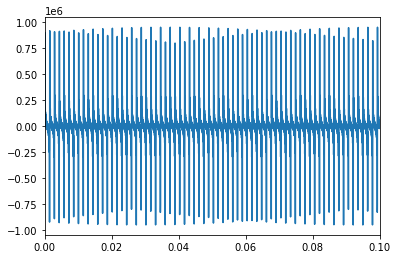

In [4]:
def main():
    samplingRate = 44100
    samplingInterval = 1/samplingRate

    nLowHarmonics = 5
    nHighHarmonics = 18
    amplitudelow = 5000
    amplitudehigh = 70000

    t = np.arange(0, 1, samplingInterval)
    lowFrequencySineWaves = np.zeros((nLowHarmonics, t.size))
    highFrequencySineWaves = np.zeros((nHighHarmonics, t.size))

    #Creating the lower harmonics from the lower fundamental
    for i in range(nLowHarmonics):
        #create sine wave from lower frequencies
        lowFrequencySineWaves[i] = amplitudelow * np.sin(2*np.pi*frequency_from_fundamental(i+1, round_at=0) * t)
        #plt.plot(t, sine_waves[i])
    #print("lowFrequencySineWaves", lowFrequencySineWaves)
    
    #Creating the higher harmonics from the higher fundamental
    for i in range(nHighHarmonics):
        #create sine wave from lower frequencies
        highFrequencySineWaves[i] = amplitudehigh * np.sin(2*np.pi*frequency_from_fundamental(i+1, round_at=0) * t)
        #plt.plot(t, sine_waves[i])
    #print("highFrequencySineWaves", highFrequencySineWaves)

    #Arbitrarly modifying our data so it sounds a little bit less terrible (and so it fits the data)
    np.delete(lowFrequencySineWaves, 1)
    np.delete(lowFrequencySineWaves, 2)
    np.delete(lowFrequencySineWaves, 3)

    sine_waves = np.concatenate((lowFrequencySineWaves, highFrequencySineWaves))
    #print("waves:", sine_waves)
    createdSineWave = add_sine_waves(sine_waves)
    createWaveFile("catastrophe", createdSineWave, samplingRate=samplingRate)

    plt.plot(t, createdSineWave)
    plt.xlim(0, 0.1)
    plt.show()

if __name__ == "__main__":
    main()

Les fichiers sons sont enregistrés dans le dossier du projet.

Les fréquences ont été choisie par rapport au spectre de la prononciation du son 'a' de "avion" récupérer grâce à Audacity.

![spectre](spectre.png)

Pour l'instant, les résultats sont catastrophiques et nécessitent d'être tweaker pour être descent. 

Nous allons utiliser des transformées de fourier (et peut être des transformées de fourier inverse) afin d'analyser et d'optimiser les résultats.